In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import math

In [2]:
def get_predictionfile() :
    filenames = os.listdir(data_for_prediction)
    filenames = [filename.split('.')[0] for filename in filenames if filename.endswith('.txt')]
    print(len(filenames)) 
    # print(filenames[:3])  
    return filenames

def dump_dictionary(dictionary, filename):
    with open(filename, 'wb') as f:
        pickle.dump(dictionary, f)

In [3]:
data_for_prediction = '../../dataPredict/output/input_data/enzymes/'
# load data
filenames = get_predictionfile()

print(filenames[1])
i = 0
unique_sub = set()
unique_enzyme = set()
unique_pair = set()

Domain_A_kcat_count = dict()
Domain_B_kcat_count = dict()
Domain_E_kcat_count = dict()
EC_kcat_count = dict()

for file in filenames:
    i+=1
    if i%1000 == 0:
        print('This is:' + str(i)) 
    #print(data_for_prediction + file + '.txt')
    new_columns = ['protein', 'org', 'domain','ko','rxn', 'ec', 'compound', 'kcat', 'km']
    a = pd.read_table(data_for_prediction + file + '.txt', sep='\t', header=None,names = new_columns)
    a['proteins_withorg'] = a['org'].map(str)  + '&' + a['protein'].map(str)  
    a['pair'] = a['proteins_withorg'] + '&' + a['compound'] 
    
    #print(a)
    newdf = a[['pair', 'kcat']] # 取出其中两列

    newdf = newdf.drop_duplicates(subset=['pair'], keep='first') 
    #newdict = dict(zip(newdf['pair'],newdf['kcat']))
    allvalues = list(newdf['kcat'])
    #print(len(allvalues))

    if a['domain'][2] == 'B':
        Domain_B_kcat_count[file] = allvalues
    elif a['domain'][2] == 'A':
        Domain_A_kcat_count[file] = allvalues
    elif a['domain'][2] == 'E':
        Domain_E_kcat_count[file] = allvalues
    #print(a['compound'].values)
    unique_sub.update(a['compound'].values)

    unique_enzyme.update(a['proteins_withorg'].values)
    unique_pair.update(a['pair'].values)
    #print(unique_pair)
    for j in range(1,8):
        index = a['ec'].str.startswith( str(j)+'.',na=False)
        newdf = a[index] # extract lines starts with ecxxxx
        newdf = newdf[['pair', 'kcat']] # extract two columns
        #print(newdf)
        newdf = newdf.drop_duplicates(subset=['pair'], keep='first')
        if 'ec' + str(j) not in EC_kcat_count.keys():
            EC_kcat_count['ec' + str(j)] = newdf['kcat'].values
            #print(EC_kcat_count['ec' + str(j)])
        else:
            EC_kcat_count['ec' + str(j)] = np.append(EC_kcat_count['ec' + str(j)],newdf['kcat'].values)
            #print('ec' + str(j) + ':',str(len(EC_kcat_count['ec' + str(j)])))


dump_dictionary(unique_sub, 'unique_sub' + str(i) + '.pickle')
dump_dictionary(unique_enzyme, 'unique_enzyme'+ str(i) +'.pickle')
dump_dictionary(unique_pair, 'unique_pair'+ str(i) +'.pickle')
dump_dictionary(EC_kcat_count, 'EC_kcat_count' + str(i) + '.pickle')
dump_dictionary(Domain_A_kcat_count, 'Domain_A_kcat_count'+ str(i) +'.pickle')
dump_dictionary(Domain_B_kcat_count, 'Domain_B_kcat_count'+ str(i) +'.pickle')
dump_dictionary(Domain_E_kcat_count, 'Domain_E_kcat_count'+ str(i) +'.pickle')

8099
rat
This is:1000
This is:2000
This is:3000
This is:4000
This is:5000
This is:6000
This is:7000
This is:8000


In [4]:
len(unique_sub)

4147

In [5]:
len(unique_enzyme)

5826045

In [6]:
len(unique_pair)

25795560

In [7]:
# get data
def count_species(dictWithvalues):
    count_res = list()
    for species in dictWithvalues.keys():
        #print(species)
        count_res.append(len(dictWithvalues[species]))
    return count_res

print(count_species(Domain_A_kcat_count))
    

[1733, 2666, 1506, 2404, 2636, 1717, 2116, 1371, 2701, 1808, 1715, 1700, 1462, 1816, 2298, 2221, 1318, 1756, 2178, 1548, 2260, 1670, 2217, 1693, 1596, 2819, 1500, 1666, 1472, 1474, 1392, 3198, 1796, 1524, 2245, 2237, 1722, 1517, 1731, 2039, 1313, 1744, 1716, 1707, 2224, 917, 3029, 2657, 1748, 1994, 1851, 2016, 2179, 1171, 2681, 1427, 2214, 1656, 2137, 2206, 1758, 2398, 1605, 2543, 2043, 1047, 2740, 3168, 1891, 1391, 1629, 1334, 2057, 2742, 1834, 1800, 2671, 1799, 2179, 1650, 1856, 1725, 2192, 1489, 1986, 1883, 2390, 2135, 2410, 1909, 1797, 2049, 1715, 2035, 2274, 1756, 1746, 2204, 1879, 2032, 2170, 1296, 1687, 1296, 1790, 1931, 2192, 1207, 1438, 1130, 2354, 2226, 1354, 1904, 2597, 1890, 2111, 1923, 1628, 2043, 1858, 1312, 1129, 564, 2159, 2055, 2370, 1977, 1530, 1966, 2676, 1609, 1500, 1556, 2032, 2048, 3142, 2626, 3861, 1946, 2812, 1976, 1933, 1525, 2628, 1582, 3227, 2911, 1496, 3185, 1271, 2609, 1964, 1519, 1498, 3084, 1689, 2456, 1823, 2399, 2597, 2242, 2003, 2456, 1956, 1533, 2353,

In [8]:
print(len(count_species(Domain_A_kcat_count)))
print(len(count_species(Domain_B_kcat_count)))
print(len(count_species(Domain_E_kcat_count)))

389
6963
747


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


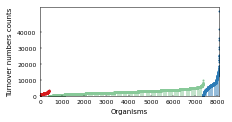

7354


In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(3,1.5))

# To solve the 'Helvetica' font cannot be used in PDF file
# https://stackoverflow.com/questions/59845568/the-pdf-backend-does-not-currently-support-the-selected-font
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')
plt.xticks(list(np.arange(0,8100,1000)))

plt.xlabel('Organisms', fontsize=7)
plt.ylabel('Turnover numbers counts', fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(frameon=False, prop={"size":6})

ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

# Figure for archeae
index = len(count_species(Domain_A_kcat_count)) +1
x = list(range(1,index))
y = count_species(Domain_A_kcat_count)
y.sort()
plt.bar(x, y, color = '#d7191c',alpha=.5)
plt.scatter(x, y, color = '#d7191c',s=1)

x = list(range(index + 1,index + 1 + len(count_species(Domain_B_kcat_count))))
index = index + len(count_species(Domain_B_kcat_count)) + 1
y = count_species(Domain_B_kcat_count)
y.sort()
plt.bar(x, y, color = '#88c999',alpha=.5)
plt.scatter(x, y, color = '#88c999',s=1)

x = list(range(index + 1,index + 1 +len(count_species(Domain_E_kcat_count))))
#print(x)
y = count_species(Domain_E_kcat_count)
y.sort()
plt.bar(x, y, color = '#2c7bb6',alpha=.5)
plt.scatter(x, y, color = '#2c7bb6',s=1)
#print(len(x))
#print(len(y))
plt.xlim([0,8099])
ax = plt.gca()


ax.axes.yaxis.set_ticks([0,10000,20000,30000,40000])
plt.savefig("Fig_NumOfValues.pdf", dpi=400, bbox_inches='tight')


plt.show()
print(index)

In [10]:
# distribution figure
def allvalues_out(dict_domain):
    #print(len(dict_domain.values()))
    result = [element for lis in dict_domain.values() for element in lis]
    result = np.array(result)
    result[result == 0] = 0.00001
    #print(len(result))
    return result


def distri_dig(y,color,leg):

    n, bins, patches=plt.hist(x=np.log10(y),bins = 200,
                          histtype='step',#直方图的类型默认为bar{'bar', 'barstacked', 'step', 'stepfilled'}
                          facecolor='black',#箱子颜色 
                          edgecolor=color,#箱子边框颜色
                          density=False,
                          alpha= 1,
                          label = leg,
                          linewidth=0.5)

    #print(len(n))#频数
    #print(len(bins))#箱子边界
    #print(patches)#箱子数

    return n,bins

Median of the Eukaryotes:  4.527
Median of the Bacteria:  5.2003
Median of the Archaea:  4.9525
Median of the Total:  5.0413
Ratio in 1/s to 100/s:  (1, 100]    0.745576
dtype: float64


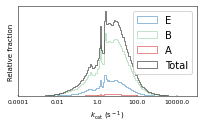

In [11]:
plt.figure(figsize=(3,1.5))
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')

plt.ylabel('Relative fraction', fontsize=7)
plt.xlabel('$k$$_\mathregular{cat}$ (s$^-$$^1$)', fontsize = 7)
#plt.legend(frameon=False, prop={"size":6})


ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)



yE = allvalues_out(Domain_E_kcat_count)
print('Median of the Eukaryotes: ', str(np.median(yE)))
n,bins = distri_dig(yE,'#2c7bb6','E')
width = (bins[2] - bins[1])/2
#plt.plot(bins[:-1] + width,n,'-',color='#2c7bb6')

yB = allvalues_out(Domain_B_kcat_count)
print('Median of the Bacteria: ', str(np.median(yB)))
n,bins = distri_dig(yB,'#88c999','B')
#plt.plot(bins[:-1] + width,n,'-',color='#88c999')

yA = allvalues_out(Domain_A_kcat_count)
print('Median of the Archaea: ', str(np.median(yA)))
n,bins = distri_dig(yA,'#d7191c','A')
#plt.plot(bins[:-1] + width,n,'-',color='#d7191c')

# plot all data
y_all = np.append(yB, yE, axis=0)
y_all = np.append(y_all, yA, axis=0)
print('Median of the Total: ', str(np.median(y_all))) # calculate the meadian
# calculate ratio of values fall in 1/s to 100/s
cats=pd.cut(y_all,[1,100])
fraction = pd.value_counts(cats)/len(y_all)

print('Ratio in 1/s to 100/s: ', str(fraction))
n,bins = distri_dig(y_all,'black','Total')
#plt.plot(bins[:-1] + width,n,'-',color='black')
plt.xticks([-6.,-4.,-2.,0.,2.,4.,6.])

locs, labels = plt.xticks()
plt.xticks(locs[1:-1], np.power(10,locs)[1:-1], fontsize = 6)
ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.xlim(-4,5)
#leg = plt.legend({'Total'},'Location','northwest','Fontsize',6,'FontName','Helvetica');
#leg.ItemTokenSize = [0,5];


plt.legend()
plt.savefig("Fig_Distributions.pdf", dpi=400, bbox_inches='tight')

plt.show()


In [12]:
EC_kcat_count

{'ec1': array([ 2.5563,  2.5774,  2.1846, ..., 21.2244, 18.5165, 20.1691]),
 'ec2': array([ 9.1635,  4.8438,  6.3165, ...,  8.4781, 10.3118,  9.6941]),
 'ec3': array([ 3.3949,  9.2261,  2.0675, ..., 27.4366,  0.0827,  3.0681]),
 'ec4': array([ 0.6676,  2.3313, 14.8075, ...,  3.8181,  2.5258,  0.5372]),
 'ec5': array([15.5665, 15.5665, 35.1687, ...,  8.5228, 11.1467, 11.1467]),
 'ec6': array([ 0.0538, 23.9886, 14.6505, ..., 10.1374, 38.1879, 17.5814]),
 'ec7': array([  4.8802,   7.6979, 294.3812, ...,   8.6553,   5.1223,   7.3226])}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


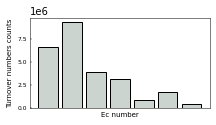

In [13]:
# plot for EC number
plt.figure(figsize=(3,1.5))

# To solve the 'Helvetica' font cannot be used in PDF file
# https://stackoverflow.com/questions/59845568/the-pdf-backend-does-not-currently-support-the-selected-font
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')
plt.xticks(list(np.arange(0,8100,1000)))

plt.xlabel('Ec number', fontsize=7)
plt.ylabel('Turnover numbers counts', fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(frameon=False, prop={"size":6})

ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

# Figure for EC number
EC_kcat_count
index = len(count_species(EC_kcat_count)) +1
x = list(range(1,index))
y = count_species(EC_kcat_count)
#y.sort()
plt.bar(x, y, facecolor = '#CBD4CE', edgecolor = 'black',alpha=1)
#plt.scatter(x, y, color = '#d7191c',s=0.1)


#ax.axes.yaxis.set_ticks([0,10000,20000,30000,40000])
plt.savefig("Fig_NumOfValues_EC.pdf", dpi=400, bbox_inches='tight')
plt.show()


Median of the ec 1 :  5.1846
Median of the ec 2 :  4.3286
Median of the ec 3 :  6.5182
Median of the ec 4 :  5.7836
Median of the ec 5 :  7.3239
Median of the ec 6 :  4.0426
Median of the ec 7 :  5.84675
7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


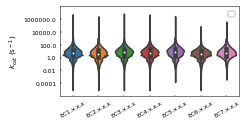

In [14]:
import seaborn as sns  


plt.figure(figsize=(3,1.5))
plt.rcParams['pdf.fonttype'] = 42

plt.axes([0.12,0.12,0.83,0.83])

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'

plt.tick_params(direction='in')
plt.tick_params(which='major',length=1.5)
plt.tick_params(which='major',width=0.4)


# plt.rc('font', family='Helvetica')

plt.ylabel('$k$$_\mathregular{cat}$ (s$^-$$^1$)', fontsize=7)
#plt.xlabel('$k$$_\mathregular{cat}$ (s$^-$$^1$)', fontsize = 7)
#plt.legend(frameon=False, prop={"size":6})


ax = plt.gca()
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

y_all = list()
for i in range(1,8):
    y = EC_kcat_count['ec' + str(i)]
    y[y == 0] = 0.00001
    y_all.append(np.log10(y))
    print('Median of the ec', str(i),': ',str(np.median(y)))
    #n,bins = distri_dig(y,'#2c7bb6','E')
    #sns.distplot(y, hist_kws={'cumulative': True, 'density': True}, kde_kws={'cumulative': True})
    #sns.ecdfplot(data=np.log10(y))


# plot all data
print(len(y_all))
#print('Median of the Total: ', str(np.median(y_all))) # calculate the meadian
# calculate ratio of values fall in 1/s to 100/s
#cats=pd.cut(y_all,[1,100])
#print(cats)

#fraction = pd.value_counts(cats)/len(y_all)

#print('Ratio in 1/s to 100/s: ', str(fraction))

#n,bins = distri_dig(y_all,'black','Total')
#sns.distplot(y_all, hist_kws={'cumulative': True, 'density': True}, kde_kws={'cumulative': True})
#sns.ecdfplot(data=np.log10(y_all))
#plt.plot(bins[:-1] + width,n,'-',color='black')
sns.violinplot(x=None, y=None, hue=None,
                   data=y_all, order=None, hue_order=None, 
                   bw='scott', cut=2, scale='area', scale_hue=True, 
                   gridsize=100, width=0.8, inner='box', split=False,
                   dodge=True, orient=None, linewidth=None,
                   color=None, palette=None, saturation=0.75,
                   ax=None)
sns.set_context("talk",font_scale=0.5,rc={"lines.linewidth":1})
#plt.xticks([-6.,-4.,-2.,0.,2.,4.,6.])
#plt.xlim([-4,5])
#locs, labels = plt.xticks()
#plt.xticks(locs[1:-1], np.power(10,locs)[1:-1], fontsize = 6)
#ax = plt.gca()
#ax.axes.yaxis.set_ticks([])

#leg = plt.legend({'Total'},'Location','northwest','Fontsize',6,'FontName','Helvetica');
#leg.ItemTokenSize = [0,5];

plt.yticks([-6.,-4.,-2.,0.,2.,4.,6.,8.])
plt.ylim([-6,8])
locs, labels = plt.yticks()
plt.yticks(locs[1:-1], np.power(10,locs)[1:-1], fontsize = 6)
ax = plt.gca()
labels = ax.set_xticklabels(['EC1.x.x.x','EC2.x.x.x','EC3.x.x.x','EC4.x.x.x','EC5.x.x.x','EC6.x.x.x','EC7.x.x.x'],rotation = 30,fontsize = 6)
plt.legend()
plt.savefig("Fig_Distributions_ec.pdf", dpi=400, bbox_inches='tight')

plt.show()

